## 第二次编程小作业（10分）

综合练习1：使用matplotlib进行餐厅小费情况分析

要求输出包含4个子图的均匀图中图

1.小费（tip）和总消费（total_bill）之间的关系（散点图）

2.性别（sex）和抽烟与否（smoker）的组合因素对小费的分布影响（分类箱线图，按性别分组，每组再按抽烟与否划分子组进行绘图）

3.工作日与否（day）和时间（time）的组合因素对平均总消费（total_bill）的影响（分类柱状图，按工作日与否分组，每组再按时间划分子组进行绘图）

4.就餐人数（size）对小费（tip）的分布影响（分类箱式图）

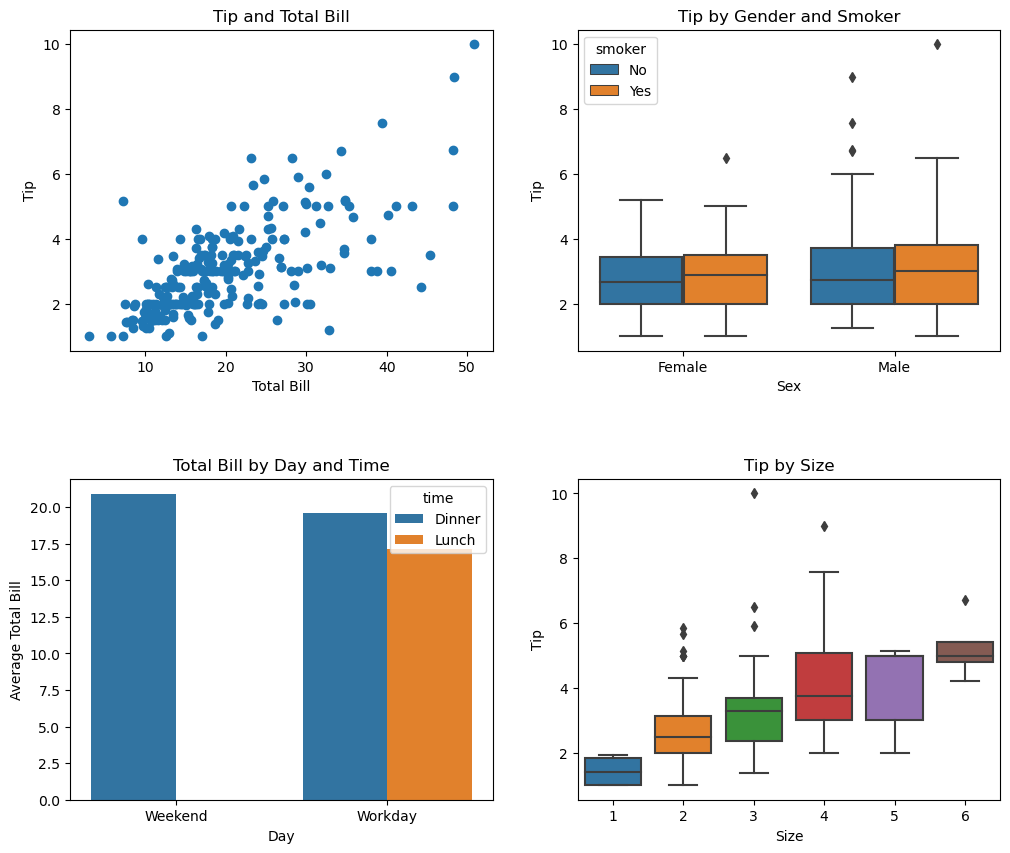

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# TODO
data = pd.read_csv('/home/willox/seaborn-data-master/tips.csv') # custom path
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4)

axs[0, 0].scatter(data['total_bill'], data['tip'])
axs[0, 0].set_xlabel('Total Bill')
axs[0, 0].set_ylabel('Tip')
axs[0, 0].set_title('Tip and Total Bill')

sns.boxplot(data=data, x='sex', y='tip', hue='smoker', ax=axs[0, 1])
axs[0, 1].set_xlabel('Sex')
axs[0, 1].set_ylabel('Tip')
axs[0, 1].set_title('Tip by Gender and Smoker')

data['day'] = data['day'].replace(['Thur', 'Fri'], 'Workday')
data['day'] = data['day'].replace(['Sat', 'Sun'], 'Weekend')
average_total_bill = data.groupby(['day', 'time'])['total_bill'].mean().reset_index()
sns.barplot(data=average_total_bill, x='day', y='total_bill', hue='time', ax=axs[1, 0])
axs[1, 0].set_xlabel('Day')
axs[1, 0].set_ylabel('Average Total Bill')
axs[1, 0].set_title('Total Bill by Day and Time')

sns.boxplot(data=data, x='size', y='tip', ax=axs[1, 1])
axs[1, 1].set_xlabel('Size')
axs[1, 1].set_ylabel('Tip')
axs[1, 1].set_title('Tip by Size')

plt.show()

综合练习2：使用matplotlib绘制2D李萨如动态曲线

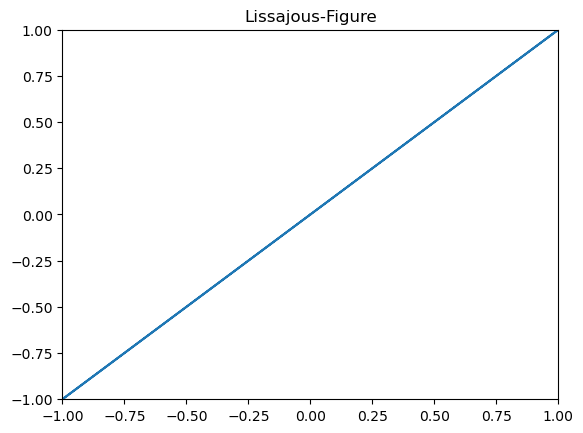

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
import matplotlib.animation as animation

# TODO
%matplotlib qt5
fig=plt.figure()
axs=fig.add_subplot(111)
axs.set(xlim=[-1,1],ylim=[-1,1],title='Lissajous-Figure')
theta=np.linspace(0,2*np.pi,1000)
x=np.sin(theta)
y=np.sin(theta)
Liss,=axs.plot(x,y)
p=1
q=1
def updata(n):
    x=np.sin(p*theta)
    y=np.sin(q*theta+n*np.pi)
    Liss.set_data(x,y)
    return Liss
ani=animation.FuncAnimation(fig,updata,frames=np.linspace(0,2,100),interval=10)
ani.save('Liss.gif', writer = 'pillow')
plt.show()

##### 综合练习3：设计一个函数，将一个十进制数转为一个十位的二进制列表
##### 例：输入20，返回[0, 0, 0, 0, 0, 1, 0, 1, 0, 0]


In [3]:
def convert_to_bin(x):
    # TODO
    result = list()
    while x > 0:
        result.insert(0, x % 2)
        x = x // 2
    while len(result) < 10:
        result.insert(0, 0)
    return result

print(convert_to_bin(20))

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0]


综合练习4：
- 用scatter函数画出数据集的散点图
- 使用coutour、coutourf绘制损失函数(关于w、b)的等高线图，并要求做标题、图例、X轴和Y轴的标识

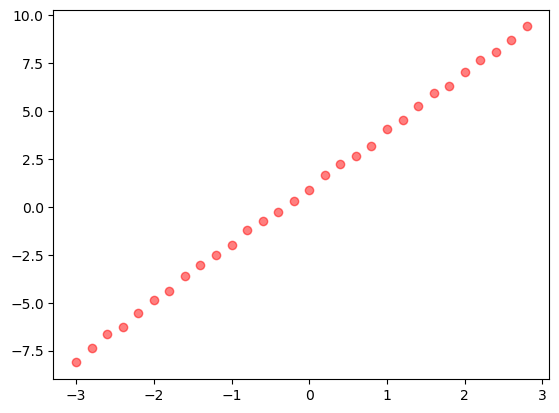

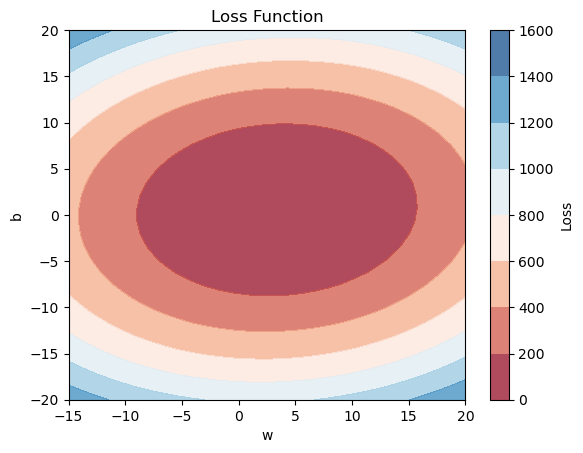

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-3,3,0.2).reshape(-1,1)
disturb = np.random.randn(X.size).reshape(-1,1)
Y = 3 * X + 1 + 0.1 * disturb

# TODO: 1.画散点图

plt.scatter(X, Y, c = 'r', alpha = .5)
plt.show()

#损失函数
def loss(w,b):
    return np.mean((Y - w * X - b) ** 2)

eg_w = np.linspace(-15,20,30)
eg_b = np.linspace(-20,20,30)

# TODO: 2.画等高线图
loss_values = np.zeros((len(eg_w), len(eg_b)))
for i, w in enumerate(eg_w):
    for j, b in enumerate(eg_b):
        loss_values[i, j] = loss(w, b)
w, b = np.meshgrid(eg_w, eg_b)
C = plt.contourf(w, b, loss_values, 8, alpha = .75, cmap = plt.cm.RdBu)
plt.xlabel('w')
plt.ylabel('b')
plt.title('Loss Function')
plt.colorbar(label='Loss')
plt.show()

综合练习5：请查询上海交通大学的经纬度，并由此画出交大的地图
（可以通过腾讯地图数据）

In [6]:
import folium

# TODO
latitude = 31.0282
longitude = 121.43588
map = folium.Map(location = [latitude, longitude], zoom_start = 17)
folium.TileLayer(tiles='http://webrd02.is.autonavi.com/appmaptile?lang=zh_cn&size=1&scale=1&style=8&x={x}&y={y}&z={z}',
                         attr="&copy; <a href=http://ditu.amap.com/>高德地图</a>",
                         min_zoom=0,
                         max_zoom=19,
                         control=True,
                         show=True,
                         overlay=False,
                         name='baseLayerTitle'
                         ).add_to(map)
map